In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import joblib
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, classification_report
import os

In [3]:
train_repos = [
"airflow", "ansible", "black", "celery", "core", "cpython", "django", "jax",
"lightning", "localstack", "numpy", "openpilot", "pandas", "pipenv", "poetry",
"ray", "redash", "scikit-learn", "sentry","scrapy", "spaCy", "transformers", "yolov5"
]

In [4]:
train_df = []
for  re in train_repos:
    train_data= pd.read_csv(f"D:/MSC/SEMESTER3/TextMining/Labs/myenv/fea_train/{re}.csv")
    print(len(train_data))
    train_df.append(train_data)

combined_df = pd.concat(train_df, ignore_index=True)
print(len(combined_df))

23232
74518
715
5714
54235
8103
15398
1089
15256
2495
1356
2082
21801
170
3196
46008
805
12076
23122
599
3442
2261
1666
319339


In [5]:
X_train = combined_df.iloc[:, :-1]
train_count =combined_df.shape[0]
# X_train = X_train.drop(columns=["num_changes"])
y_train = combined_df.iloc[:, -1]

In [6]:
val_df = []
for  re in train_repos:
    val_data= pd.read_csv(f"D:/MSC/SEMESTER3/TextMining/Labs/myenv/fea_val/{re}.csv")
    val_df.append(val_data)
combined_dfv = pd.concat(val_df, ignore_index=True)

X_val = combined_dfv.iloc[:, :-1]
val_count =combined_dfv.shape[0]
# X_train = X_train.drop(columns=["num_changes"])
y_val = combined_dfv.iloc[:, -1]

In [7]:
test_df = []
for  re in train_repos:
    test_data= pd.read_csv(f"D:/MSC/SEMESTER3/TextMining/Labs/myenv/fea_test/{re}.csv")
    test_df.append(test_data)
combined_dft = pd.concat(test_df, ignore_index=True)

X_test = combined_dft.iloc[:, :-1]
test_count =combined_dft.shape[0]
# X_train = X_train.drop(columns=["num_changes"])
y_test = combined_dft.iloc[:, -1]

In [12]:
model = xgb.XGBClassifier(
    n_estimators=1000,           # Reduced to prevent overfitting
    learning_rate=0.05,          # Slightly higher for faster convergence
    max_depth=6,                # Increased to capture more complex patterns
    subsample=0.9,              # More data per tree
    colsample_bytree=0.9,       # More features per tree
    reg_alpha=0.5,              # Reduced L1 regularization
    reg_lambda=2.0,             # Increased L2 regularization for better generalization
    tree_method="hist",         # Use "gpu_hist" if GPU is available
    n_jobs=-1,                  # Use all CPU cores
    use_label_encoder=False,
    eval_metric="logloss"           # AUC is more informative for imbalanced classification
)

model.fit(X_train, y_train,
            eval_set=[(X_val, y_val)],
            verbose=True)

c:\Users\ayega\miniconda3\envs\tbmi26_tf\lib\site-packages\xgboost\training.py:183: UserWarning: [13:58:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[0]	validation_0-logloss:0.47210
[1]	validation_0-logloss:0.45047
[2]	validation_0-logloss:0.43076
[3]	validation_0-logloss:0.41298
[4]	validation_0-logloss:0.39601
[5]	validation_0-logloss:0.38038
[6]	validation_0-logloss:0.36583
[7]	validation_0-logloss:0.35249
[8]	validation_0-logloss:0.33984
[9]	validation_0-logloss:0.32802
[10]	validation_0-logloss:0.31702
[11]	validation_0-logloss:0.30668
[12]	validation_0-logloss:0.29679
[13]	validation_0-logloss:0.28750
[14]	validation_0-logloss:0.27887
[15]	validation_0-logloss:0.27066
[16]	validation_0-logloss:0.26289
[17]	validation_0-logloss:0.25564
[18]	validation_0-logloss:0.24879
[19]	validation_0-logloss:0.24228
[20]	validation_0-logloss:0.23604
[21]	validation_0-logloss:0.23012
[22]	validation_0-logloss:0.22451
[23]	validation_0-logloss:0.21916
[24]	validation_0-logloss:0.21428
[25]	validation_0-logloss:0.20954
[26]	validation_0-logloss:0.20490
[27]	validation_0-logloss:0.20060
[28]	validation_0-logloss:0.19662
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=-1,
              num_parallel_tree=None, ...)

In [10]:
model = xgb.XGBClassifier(
    n_estimators=500,           # Reduced to prevent overfitting
    learning_rate=0.1,          # Slightly higher for faster convergence
    max_depth=8,                # Increased to capture more complex patterns
    subsample=0.9,              # More data per tree
    colsample_bytree=0.9,       # More features per tree
    reg_alpha=0.5,              # Reduced L1 regularization
    reg_lambda=2.0,             # Increased L2 regularization for better generalization
    tree_method="hist",         # Use "gpu_hist" if GPU is available
    n_jobs=-1,                  # Use all CPU cores
    use_label_encoder=False,
    eval_metric="logloss"           # AUC is more informative for imbalanced classification
)


evals_result = {}

model.fit(X_train, y_train,
            eval_set=[(X_val, y_val)],
            verbose=True)

c:\Users\ayega\miniconda3\envs\tbmi26_tf\lib\site-packages\xgboost\training.py:183: UserWarning: [13:27:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[0]	validation_0-logloss:0.44765
[1]	validation_0-logloss:0.40757
[2]	validation_0-logloss:0.37373
[3]	validation_0-logloss:0.34498
[4]	validation_0-logloss:0.31940
[5]	validation_0-logloss:0.29716
[6]	validation_0-logloss:0.27735
[7]	validation_0-logloss:0.26022
[8]	validation_0-logloss:0.24449
[9]	validation_0-logloss:0.23033
[10]	validation_0-logloss:0.21818
[11]	validation_0-logloss:0.20706
[12]	validation_0-logloss:0.19694
[13]	validation_0-logloss:0.18808
[14]	validation_0-logloss:0.17975
[15]	validation_0-logloss:0.17239
[16]	validation_0-logloss:0.16550
[17]	validation_0-logloss:0.15934
[18]	validation_0-logloss:0.15389
[19]	validation_0-logloss:0.14895
[20]	validation_0-logloss:0.14426
[21]	validation_0-logloss:0.14011
[22]	validation_0-logloss:0.13628
[23]	validation_0-logloss:0.13305
[24]	validation_0-logloss:0.13004
[25]	validation_0-logloss:0.12715
[26]	validation_0-logloss:0.12439
[27]	validation_0-logloss:0.12208
[28]	validation_0-logloss:0.11979
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=-1,
              num_parallel_tree=None, ...)

In [7]:
model = xgb.XGBClassifier(
             n_estimators=1000,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            reg_alpha=1.0,     # L1 regularization (important for sparse)
            reg_lambda=1.0,    # L2 regularization
            tree_method="hist",  # use "gpu_hist" if you have a GPU
            n_jobs=-1,
            use_label_encoder=False,
            eval_metric="logloss"
        )

model.fit(X_train, y_train,
            eval_set=[(X_val, y_val)],
            verbose=True)

c:\Users\ayega\miniconda3\envs\tbmi26_tf\lib\site-packages\xgboost\training.py:183: UserWarning: [13:02:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[0]	validation_0-logloss:0.47270
[1]	validation_0-logloss:0.45109
[2]	validation_0-logloss:0.43190
[3]	validation_0-logloss:0.41405
[4]	validation_0-logloss:0.39693
[5]	validation_0-logloss:0.38099
[6]	validation_0-logloss:0.36640
[7]	validation_0-logloss:0.35303
[8]	validation_0-logloss:0.34030
[9]	validation_0-logloss:0.32814
[10]	validation_0-logloss:0.31718
[11]	validation_0-logloss:0.30667
[12]	validation_0-logloss:0.29698
[13]	validation_0-logloss:0.28767
[14]	validation_0-logloss:0.27896
[15]	validation_0-logloss:0.27072
[16]	validation_0-logloss:0.26291
[17]	validation_0-logloss:0.25575
[18]	validation_0-logloss:0.24885
[19]	validation_0-logloss:0.24217
[20]	validation_0-logloss:0.23605
[21]	validation_0-logloss:0.23017
[22]	validation_0-logloss:0.22453
[23]	validation_0-logloss:0.21915
[24]	validation_0-logloss:0.21413
[25]	validation_0-logloss:0.20946
[26]	validation_0-logloss:0.20474
[27]	validation_0-logloss:0.20041
[28]	validation_0-logloss:0.19627
[29]	validation_0-loglos

KeyboardInterrupt: 

In [15]:
y_train_pred = model.predict(X_train)

report_train = classification_report(y_train, y_train_pred, output_dict=True)
print("Train_Accuracy:", accuracy_score(y_train, y_train_pred))

y_val_pred = model.predict(X_val)

report_validation = classification_report(y_val, y_val_pred, output_dict=True)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))


y_test_pred = model.predict(X_test)
# y_prob = model.predict_proba(X)[:, 1] 
report_test = classification_report(y_test, y_test_pred, output_dict=True)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("report_test")
print(report_test)
print("report_validation")
print(report_validation)
# print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Train_Accuracy: 0.9911285499109097
Validation Accuracy: 0.9759801898472967
Test Accuracy: 0.976067912941389
report_test
{'0.0': {'precision': 0.9905515045701961, 'recall': 0.9823793033204319, 'f1-score': 0.9864484786499617, 'support': 9818.0}, '1.0': {'precision': 0.8705089820359282, 'recall': 0.9266932270916335, 'f1-score': 0.8977228869162486, 'support': 1255.0}, 'accuracy': 0.976067912941389, 'macro avg': {'precision': 0.9305302433030622, 'recall': 0.9545362652060327, 'f1-score': 0.9420856827831051, 'support': 11073.0}, 'weighted avg': {'precision': 0.9769460348889439, 'recall': 0.976067912941389, 'f1-score': 0.9763924308195806, 'support': 11073.0}}
report_validation
{'0.0': {'precision': 0.9899981304916807, 'recall': 0.9829234338747099, 'f1-score': 0.9864480976109533, 'support': 10775.0}, '1.0': {'precision': 0.8701482004234298, 'recall': 0.9201492537313433, 'f1-score': 0.8944504896626768, 'support': 1340.0}, 'accuracy': 0.9759801898472967, 'macro avg': {'precision': 0.9300731654575

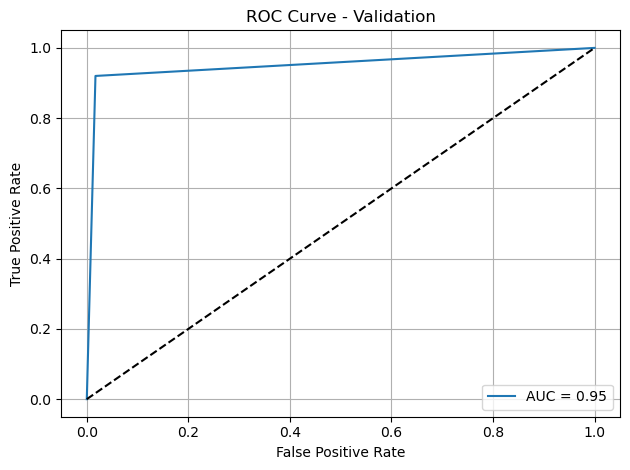

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import json
import os

# Dummy example: y_true and y_scores for each split
results = {}

# Replace these with your actual true labels and predicted probabilities

y_true = y_val  # true binary labels for split
y_score =y_val_pred # predicted probabilities for split

# AUC Score
aoc = roc_auc_score(y_true, y_score)
# results[split] = {"auc": aoc}

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_score)

# Plot and save ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {aoc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - Validation')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()

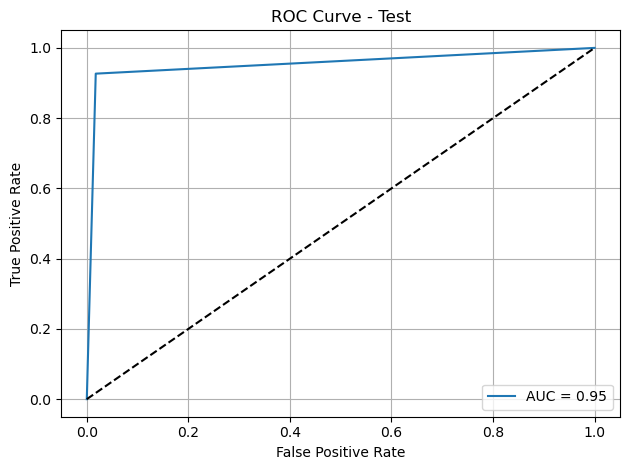

In [17]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import json
import os

# Dummy example: y_true and y_scores for each split
results = {}

# Replace these with your actual true labels and predicted probabilities

y_true = y_test  # true binary labels for split
y_score =y_test_pred # predicted probabilities for split

# AUC Score
aoc = roc_auc_score(y_true, y_score)
# results[split] = {"auc": aoc}

# ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_score)

# Plot and save ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {aoc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - Test')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()

In [19]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

alldata = pd.concat([combined_df, combined_dfv,combined_dft], ignore_index=True)
X = alldata.iloc[:, :-1]
val_count =alldata.shape[0]
print(val_count)
Y = alldata.iloc[:, -1]

342527


In [21]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    roc_auc_score, roc_curve, precision_score,
    recall_score, f1_score, RocCurveDisplay
)
import matplotlib.pyplot as plt
import numpy as np

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics
accuracies = []
precisions = []
recalls = []
f1s = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
tprs = []

# Cross-validation loop
for train_idx, val_idx in skf.split(X, Y):
    # X_train, X_val = X[train_idx], X[val_idx]
    # y_train, y_val = Y[train_idx], Y[val_idx]
    X_train = X.iloc[train_idx]
    X_val = X.iloc[val_idx]
    y_train = Y.iloc[train_idx]
    y_val = Y.iloc[val_idx]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]
    
    # Metrics
    acc = model.score(X_val, y_val)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_proba)
    
    accuracies.append(acc)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    aucs.append(auc)
    
    # ROC curve
    fpr, tpr, _ = roc_curve(y_val, y_proba)
    tpr_interp = np.interp(mean_fpr, fpr, tpr)
    tpr_interp[0] = 0.0
    tprs.append(tpr_interp)




c:\Users\ayega\miniconda3\envs\tbmi26_tf\lib\site-packages\xgboost\training.py:183: UserWarning: [14:33:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ayega\miniconda3\envs\tbmi26_tf\lib\site-packages\xgboost\training.py:183: UserWarning: [14:48:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ayega\miniconda3\envs\tbmi26_tf\lib\site-packages\xgboost\training.py:183: UserWarning: [15:06:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ayega\miniconda3\envs\tbmi26_tf\lib\site-packages\xgboost\training.py:183: UserWarning: [15:24:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Par

Mean Accuracy: 0.9717
Mean Precision: 0.9792
Mean Recall: 0.9342
Mean F1 Score: 0.9562
Mean ROC AUC: 0.9944


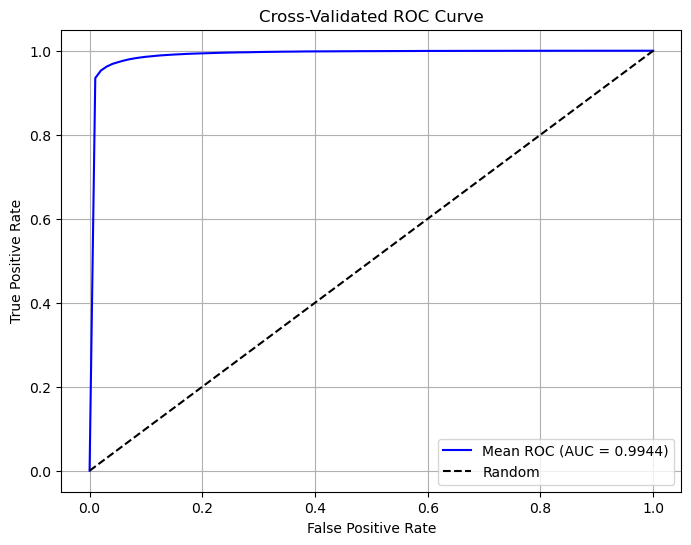

In [23]:
# Print metrics
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Mean Precision: {np.mean(precisions):.4f}")
print(f"Mean Recall: {np.mean(recalls):.4f}")
print(f"Mean F1 Score: {np.mean(f1s):.4f}")
print(f"Mean ROC AUC: {np.mean(aucs):.4f}")

# Plot average ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {np.mean(aucs):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Cross-Validated ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()